## importing libraries

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path

sys.path.append(str(Path().resolve().parent / "src"))



## Import Dataset

In [2]:
df = pd.read_csv('/home/samrawit/credit-risk-model/data/raw/data.csv')

In [3]:
print(df.shape)

(95662, 16)


In [4]:
print(df.dtypes)

TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object


Summary Statistics

In [5]:
summary_stats = df.describe()
print(summary_stats)

       CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000


Visualizing Numerical features

In [10]:
print(df.columns.tolist())

['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'Amount', 'Value', 'TransactionStartTime', 'PricingStrategy', 'FraudResult']


In [11]:
numerical_columns = df[['Amount', 'Value']]

In [13]:
summary_stats = numerical_columns.describe()
print(summary_stats)

             Amount         Value
count  9.566200e+04  9.566200e+04
mean   6.717846e+03  9.900584e+03
std    1.233068e+05  1.231221e+05
min   -1.000000e+06  2.000000e+00
25%   -5.000000e+01  2.750000e+02
50%    1.000000e+03  1.000000e+03
75%    2.800000e+03  5.000000e+03
max    9.880000e+06  9.880000e+06


In [ ]:
from EDA import plot_numerical_distributions, plot_categorical_distributions, plot_correlational_heatmap, boxplot_outliers


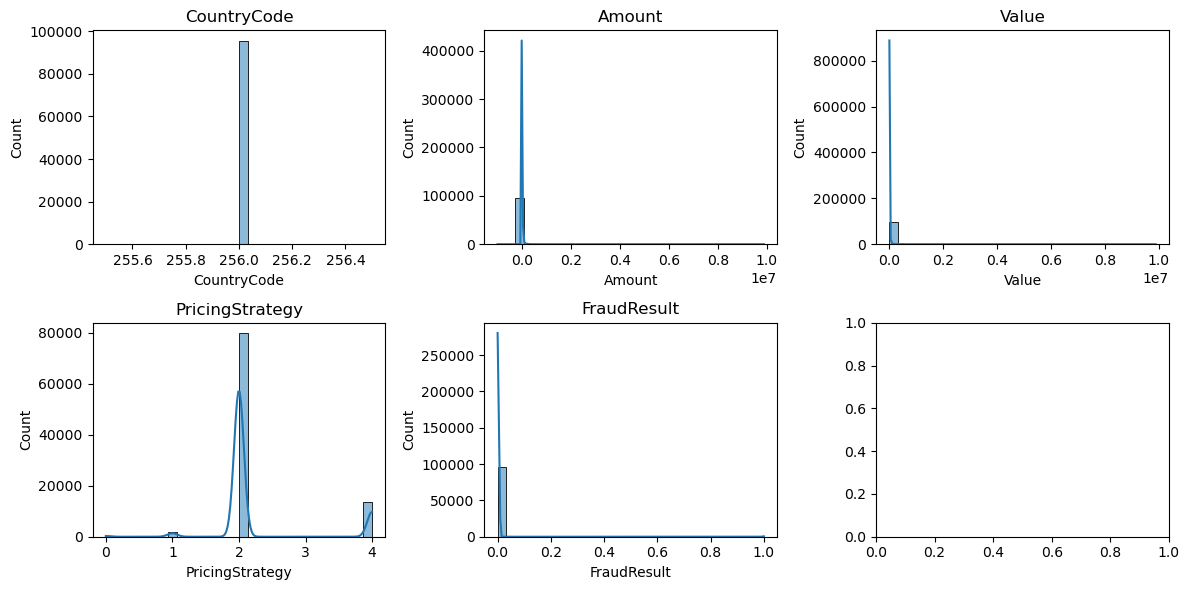

In [20]:
plot_numerical_distributions(df)

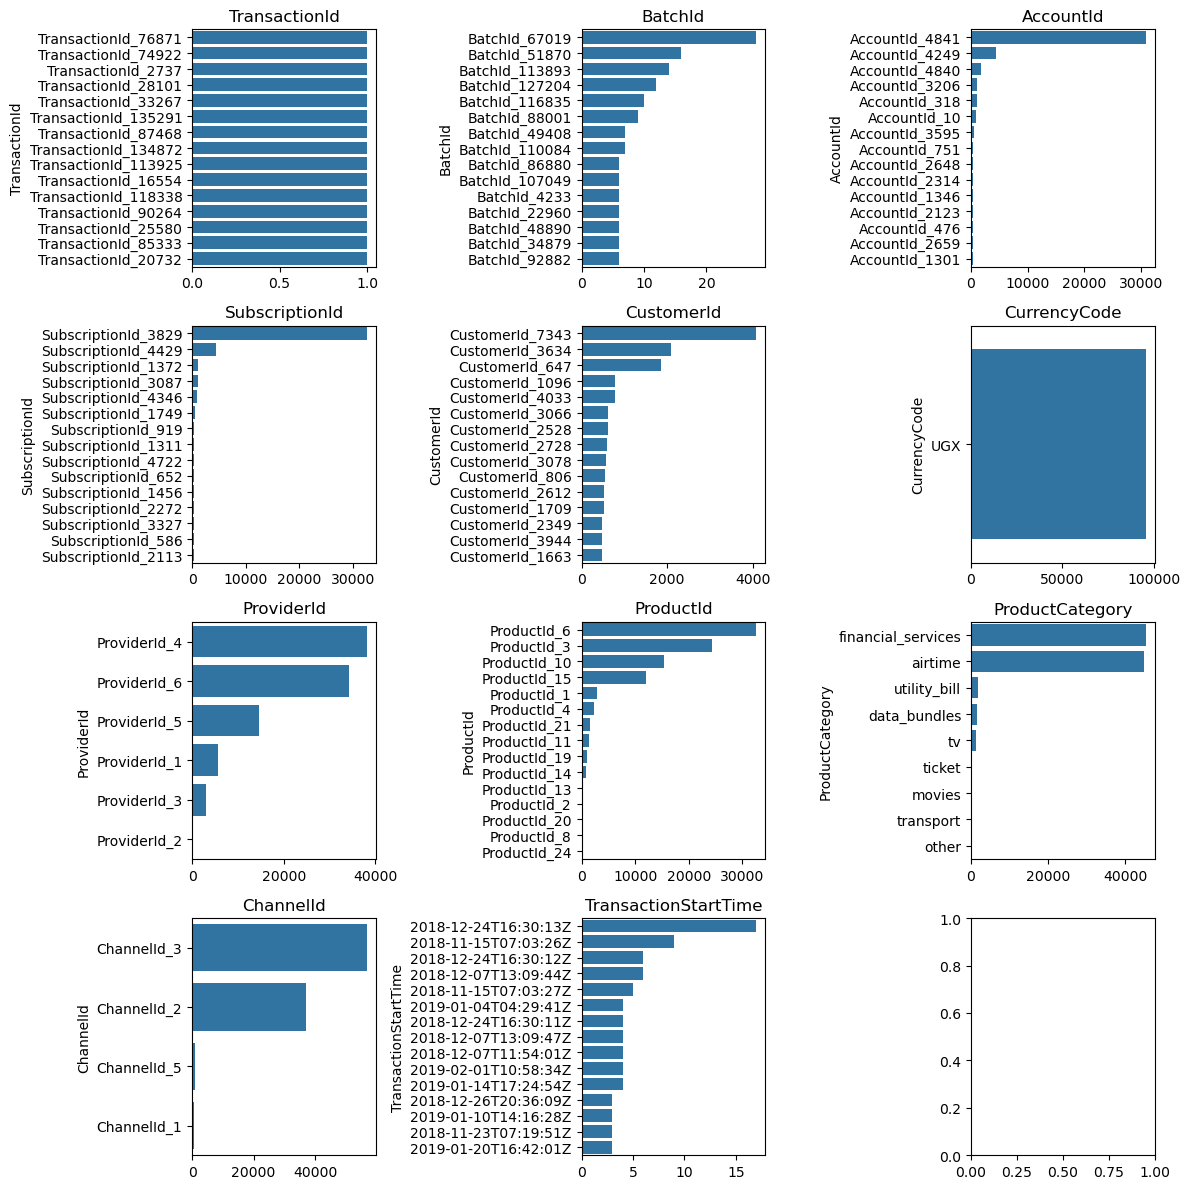

In [21]:
plot_categorical_distributions(df)

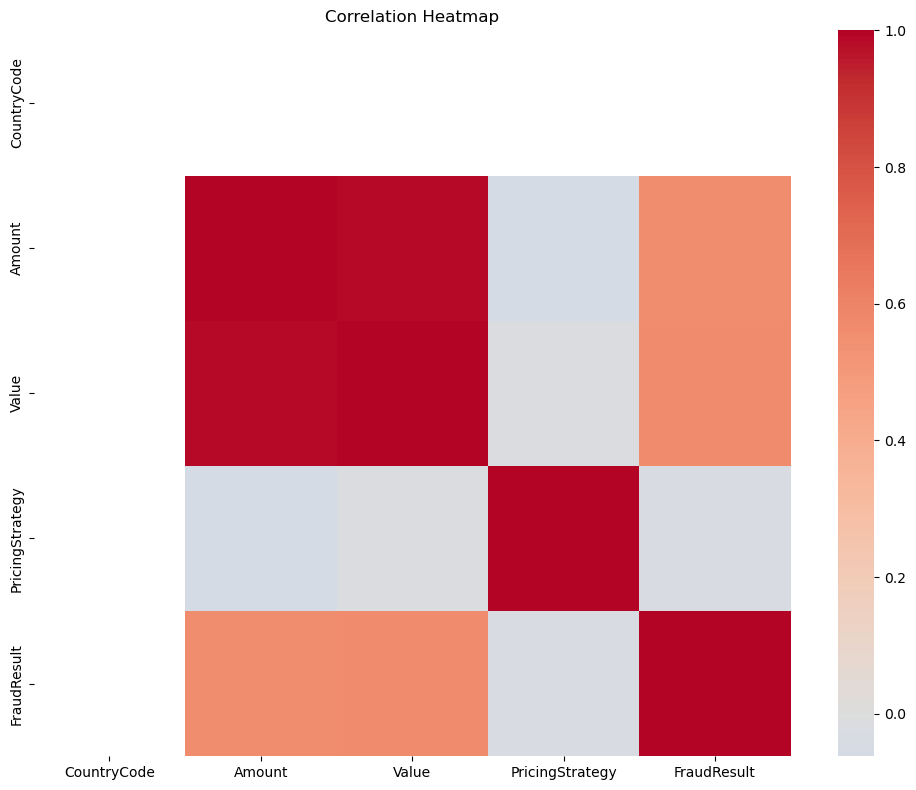

In [22]:
plot_correlational_heatmap(df)

## Missing Value

In [25]:
missing_values = df.isnull().sum()
print(missing_values)


TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64


## Outlier detection 

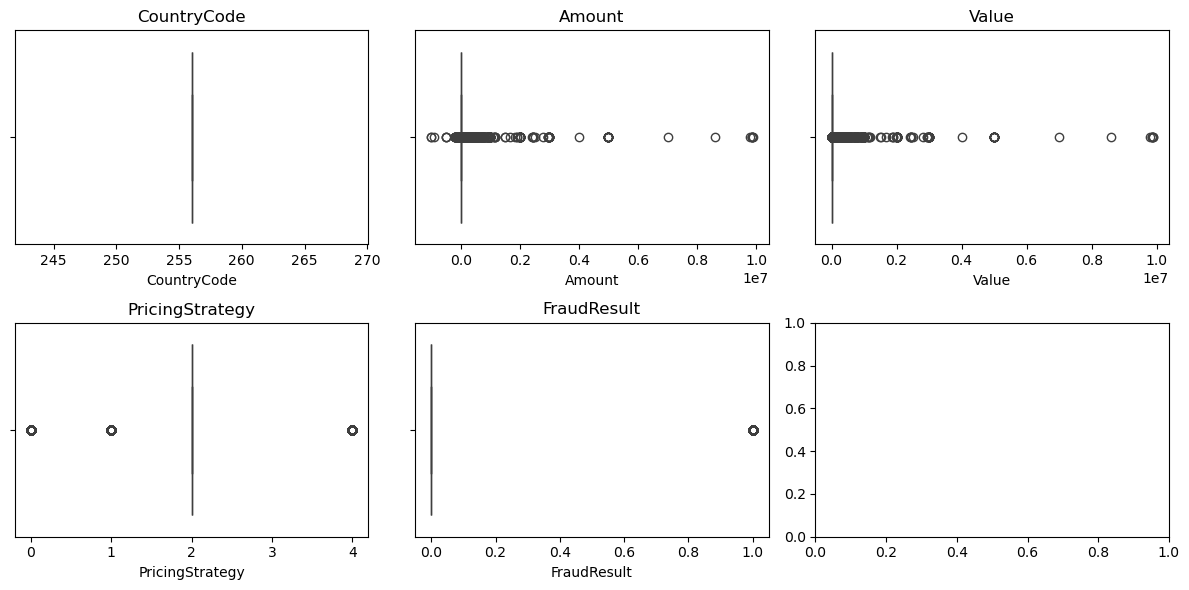

In [24]:
boxplot_outliers(df)

## time-series analysis

In [28]:
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])
df['TransactionHour'] = df['TransactionStartTime'].dt.hour
df['TransactionDay'] = df['TransactionStartTime'].dt.day
df['TransactionMonth'] = df['TransactionStartTime'].dt.month
df['TransactionYear'] = df['TransactionStartTime'].dt.year

# Save processed data for feature engineering
df.to_csv('../data/processed/ProcessedData.csv', index=False)

